<a href="https://colab.research.google.com/github/joaomerjam/ECON3916-33674-Statistical-Machine-Learning/blob/main/Assignment%201/Econ%203916%20Assignment%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phase 1: Building the Student Basket

The official Consumer Price Index (CPI) tracks a "representative basket" of goods for the average American consumer. But students are not average consumers. Our spending is concentrated in things like tuition, rent, and food, which are areas where prices have historically risen faster than the general index suggests.

For this part, I will construct a "Student Basket" of four items that reflect typical student expenses, then calculate the inflation rate for each item between 2016 and 2024.

In [1]:
# data construction
student_basket = [
    {'Item': 'Tuition (Private)', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Groceries (Monthly)', 'Price_2016': 200, 'Price_2024': 400},
    {'Item': 'Textbooks (Per Year)', 'Price_2016': 1230, 'Price_2024': 1240}, # researched and its more flat due to more online textbooks available
    {'Item': 'Red Solo Cups (50 Count)', 'Price_2016': 5.99, 'Price_2024': 12 }

]


## Data Collection Sources: ##
- Tuition: Given, mainly focusing on Private School Tuition.

- Rent (1 Bed):  Given, more Boston oriented and for off-campus housing.

- Groceries: Monthly price of groceries, I looked at some USDA Economic Research and looked at my personal spending (mine will be higher as I buy more whole protein items)

- Textbooks: Annual course materials cost, looked at College Board for prices

- Red Solo Cups - Used a lot for social and parties. I looked at older retail prices on goolge.

In [2]:
# show the basket
print("=" * 60)
print("STUDENT BASKET: 2016 vs 2024 PRICES")
print("=" * 60)
for item in student_basket:
    print(f"{item['Item']}: ${item['Price_2016']:,.2f} (2016) → ${item['Price_2024']:,.2f} (2024)")
print("=" * 60)

STUDENT BASKET: 2016 vs 2024 PRICES
Tuition (Private): $45,000.00 (2016) → $58,000.00 (2024)
Rent (1 Bed): $1,200.00 (2016) → $1,800.00 (2024)
Groceries (Monthly): $200.00 (2016) → $400.00 (2024)
Textbooks (Per Year): $1,230.00 (2016) → $1,240.00 (2024)
Red Solo Cups (50 Count): $5.99 (2016) → $12.00 (2024)


In [5]:
# inflation calculation function and loop
def calculate_inflation(base, current):
  """ this will calculate percentage change between base year and current year"""
  return ((current - base) / base) * 100\

# loop through the basket and print inflation rates
print("=" * 60)
print("INFLATION RATES FOR STUDENT BASKET (2016-2024)")
print("=" * 60)

for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")
print("=" * 60)

INFLATION RATES FOR STUDENT BASKET (2016-2024)
Tuition (Private): 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Groceries (Monthly): 100.00% Inflation
Textbooks (Per Year): 0.81% Inflation
Red Solo Cups (50 Count): 100.33% Inflation


### Phase 1 Observations
The inflation rates calculated above show some major changes in prices that college students have observed between 2016-2024.

## Key Findings ##
Groceries and Red Solo Cups have both doubled in price.
Rent also dramatically increased by 50% over 8 years.

## Phase 2: Process (The API Pipeline) and Proxy Data:
- For the Red Solo Cups I found the Household Furnishings and Supplies (CUSR0000SAH3) since it includes paper/plastic products.


In [9]:
# installing fredapi
!pip install fredapi
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
fred = Fred(api_key =  '')


In [16]:
# fetch series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA')
groceries = fred.get_series('CUSR0000SAF11')
textbooks = fred.get_series('CUSR0000SEEA')
solo_cups = fred.get_series('CUSR0000SAH3')

In [17]:
# creating dataframe
import pandas as pd

df = pd.DataFrame({
  'Official_CPI': official_cpi,
  'Tuition': tuition,
  'Rent': rent,
  'Groceries': groceries,
  'Textbooks': textbooks,
  'Solo_Cups': solo_cups
})

# Filter to 2016 onwards
df = df['2016-01-01':]

# Check the data
df.head()


,Official_CPI,Tuition,Rent,Groceries,Textbooks,Solo_Cups
2016-01-01,237.652,699.997,291.700,241.558,663.452,122.229
2016-02-01,237.336,701.688,292.617,241.741,660.050,122.144
2016-03-01,238.080,703.289,293.471,240.414,658.775,122.062
2016-04-01,238.992,704.842,294.397,240.341,666.544,121.768
2016-05-01,239.557,706.506,295.371,239.348,666.306,121.513


## The Problem: FRED data has different "Base Years."
- Tuition might be at 900 (Base 1982)
- Streaming might be at 100 (Base 2002)
Comparing 900 to 100 is meaningless. You must Re-Index everything to your student start date (2016) so every line starts at 100.

Task: Implement the following formula for every column in your DataFrame:

In [18]:
# given: Value_Index = (Value_Current / Value_at_Start_Date) * 100
for column in df.columns:
  start_value = df[column].iloc[0]
  df[column] = (df[column] / start_value) * 100

df.head()

,Official_CPI,Tuition,Rent,Groceries,Textbooks,Solo_Cups
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.314364,100.075758,99.487227,99.930458
2016-03-01,100.180095,100.470288,100.607131,99.526408,99.295051,99.863371
2016-04-01,100.563850,100.692146,100.924580,99.496187,100.466047,99.622839
2016-05-01,100.801592,100.929861,101.258485,99.085106,100.430174,99.414214


## Phase 3: Analyze and Visualizing Raw Components


In [19]:
import matplotlib.pyplot as plt

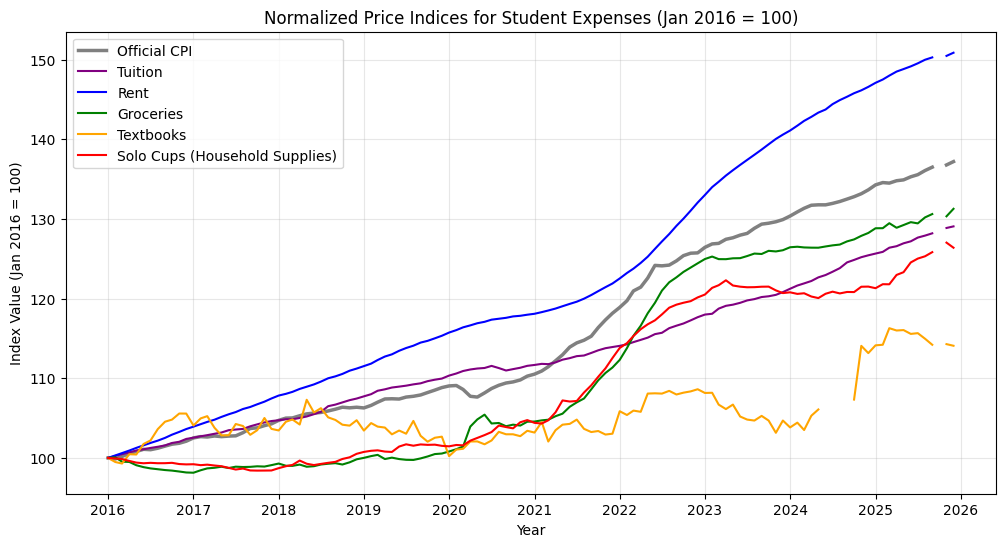

In [28]:
# plot the normalize data
plt.figure(figsize=(12,6))

plt.plot(df.index, df['Official_CPI'], label='Official CPI', color='gray', linewidth=2.5)
plt.plot(df.index, df['Tuition'], label='Tuition', color='purple')
plt.plot(df.index, df['Rent'], label='Rent', color='blue')
plt.plot(df.index, df['Groceries'], label='Groceries', color='green')
plt.plot(df.index, df['Textbooks'], label='Textbooks', color='orange')
plt.plot(df.index, df['Solo_Cups'], label='Solo Cups (Household Supplies)', color='red')

plt.title('Normalized Price Indices for Student Expenses (Jan 2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index Value (Jan 2016 = 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##The Weighted "Student SPI" (Honest Chart)


In [33]:
# weights
# the weights given by the average American household:
# housing:34%, food:13%, education: 6% and others.
# we need to consider for a students tuition and rent being around 70% of their budget.

weights = {
    'Tuition': 0.35,
    'Rent': 0.30,
    'Groceries': 0.20,
    'Textbooks': 0.05,
    'Solo_Cups': 0.10
}

df['Student_SPI'] = (
    df['Tuition'] * weights['Tuition'] +
    df['Rent'] * weights['Rent'] +
    df['Groceries'] * weights['Groceries'] +
    df['Textbooks'] * weights['Textbooks'] +
    df['Solo_Cups'] * weights['Solo_Cups']
)

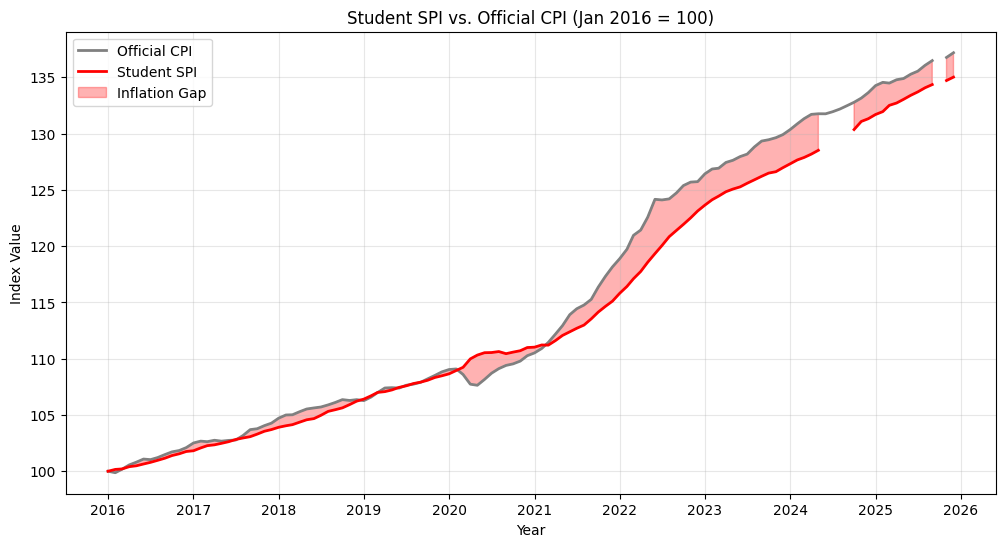

In [35]:
# plotting SPIT vs Official CPI
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Official_CPI'], label='Official CPI', color='gray', linewidth=2)
plt.plot(df.index, df['Student_SPI'], label='Student SPI', color='red', linewidth=2)

# Use fill_between to highlight the "Inflation Gap"
plt.fill_between(df.index, df['Official_CPI'], df['Student_SPI'], alpha=0.3, color='red', label='Inflation Gap')

plt.title('Student SPI vs. Official CPI (Jan 2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Bad Chart: Why we Want to Normalize

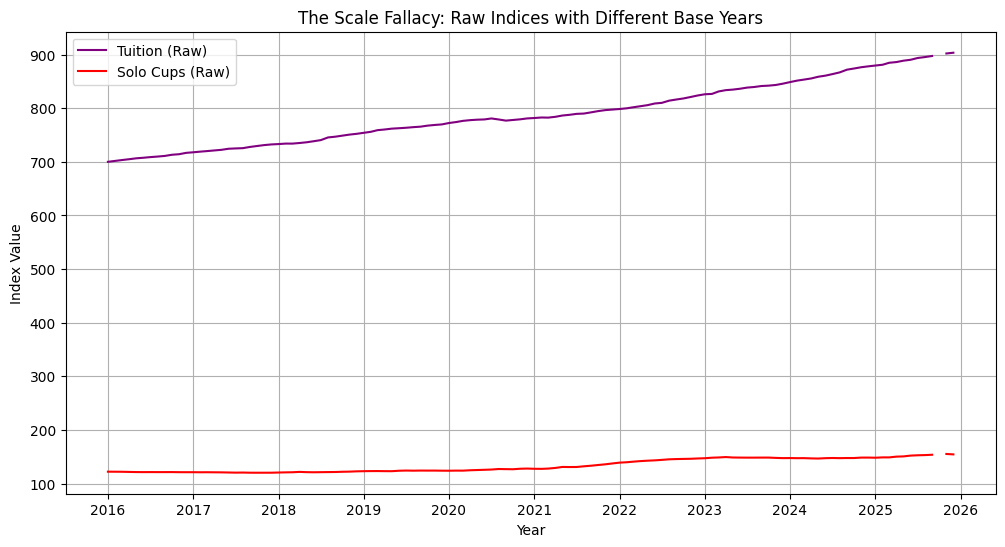

In [38]:
cpi_tuition = fred.get_series('CUSR0000SEEB')
cpi_solo_cups = fred.get_series('CUSR0000SAH3')

# using 2016 and ownwards
cpi_tuition = cpi_tuition['2016-01-01':]
cpi_solo_cups = cpi_solo_cups['2016-01-01':]

# plotting raw data
plt.figure(figsize=(12, 6))

plt.plot(cpi_tuition.index, cpi_tuition, label='Tuition (Raw)', color='purple')
plt.plot(cpi_solo_cups.index, cpi_solo_cups, label='Solo Cups (Raw)', color='red')

plt.title('The Scale Fallacy: Raw Indices with Different Base Years')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

## Phase 4: AI Expansion (The Co-Pilot Era)

Having demonstrated the ability to manually construct indices and fetch API data, I now use Generative AI (Claude/ChatGPT) to extend my analysis.

**Objective:** Compare three inflation measures on one chart:
1. **National CPI** — The official U.S. average
2. **Boston CPI** — Regional data for Boston-Cambridge-Newton (since I'm a student in Boston)
3. **Student SPI** — My custom weighted index (including Solo Cups proxy!)

This comparison tests whether the national average masks regional and demographic disparities. As a student living in Boston, one of the most expensive metro areas in the country, the local CPI may better reflect my actual cost of living than the national figure.

AI Prompt: "I have a pandas DataFrame 'df' with two existing columns: 'Official_CPI' and 'Student_SPI' (both normalized to 100).
(P)rep: Act as a Macroeconomist analyzing regional disparities.
(R)equest: Write Python code using 'fredapi' to fetch the 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton' (Find the FRED code for me).
(I)terate:
   - Re-index this new Boston series so Jan 1, 2016 = 100.
   - Plot THREE lines on one chart: 'National CPI' (Grey), 'Boston CPI' (Blue), and 'Student SPI' (Red).
(M)echanism: Use matplotlib. Handle missing values if Boston data is monthly/bimonthly.
(E)valuate: Ensure the legend clearly labels all three."

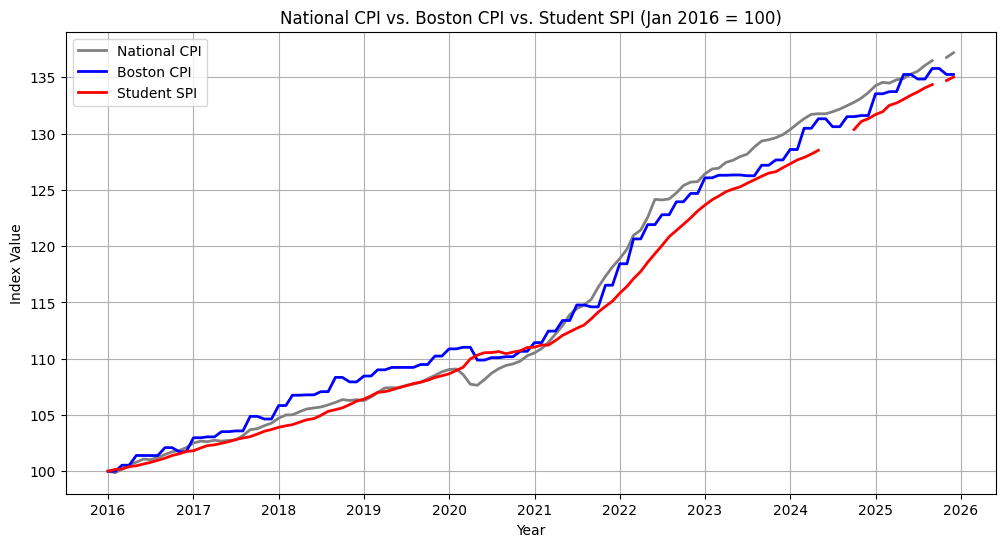

In [40]:
# Claude output:
# Fetch the Boston-Cambridge-Newton CPI
# FRED Code: CUURA103SA0
boston_cpi = fred.get_series('CUURA103SA0')

# Filter to 2016 onwards
boston_cpi = boston_cpi['2016-01-01':]

# Re-index so Jan 1, 2016 = 100
start_value = boston_cpi.iloc[0]
boston_cpi = (boston_cpi / start_value) * 100

# Add to DataFrame
df['Boston_CPI'] = boston_cpi

# Handle missing values (Boston data is bimonthly, so forward-fill gaps)
df['Boston_CPI'] = df['Boston_CPI'].ffill()

# Plot THREE lines on one chart
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Official_CPI'], label='National CPI', color='grey', linewidth=2)
plt.plot(df.index, df['Boston_CPI'], label='Boston CPI', color='blue', linewidth=2)
plt.plot(df.index, df['Student_SPI'], label='Student SPI', color='red', linewidth=2)

plt.title('National CPI vs. Boston CPI vs. Student SPI (Jan 2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()